In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from collections import Counter
from seaborn import heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import re

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
from spacy.tokens import Doc, Token, Span

import gensim


# EDA and spaCy Preprocessing

### Some Additional Cleaning Performed during EDA

In [74]:
df= pd.read_csv('../story_data.csv',index_col='index' )

In [75]:
df=df[['story_title', 'story_text', 'book_id', 'book_author', 'book_title']]

In [76]:
def word_count(string):
    return len(string.split(' '))

In [77]:
def flag_acknowledgments(string):
  return 'acknowledgment' in string.lower()

In [78]:
def remove_underscores_spaces(story):
  split_string=story.split(' ')
  return ' '.join([word.replace('_','') for word in split_string if ' ' not in word])

In [79]:
df['story_text'] = df.story_text.apply(lambda x: remove_underscores_spaces(x))

In [80]:
df['word_count']= df.story_text.map(lambda x: word_count(x))

In [81]:
df['flag_acknow']=df.story_title.apply(flag_acknowledgments)

In [82]:
df.drop(index=df[df.flag_acknow==True].index, inplace=True)

In [83]:
df= df[(df.word_count>50)&(df.word_count<12000)]
df.reset_index(inplace=True)

## Preprocessing with spaCy for EDA

In [7]:
df=pd.read_csv('final_stories.csv', index_col=0)

In [9]:
df.story_title.apply(lambda x: x.replace("’S","’s"))

0        The Orchard'S Grandmother
1                            Rough
2                 The Music Lesson
3                        The Frost
4                       My Picture
                   ...            
21458             Mortuary Customs
21459            Bodily Affections
21460                      Apparel
21461                     The Moon
21462          Boston And New York
Name: story_title, Length: 21463, dtype: object

In [19]:
#Code used for a Collab notebook to attempt to process all texts
def gpu_nlp_pipe(series_of_texts):
  with tf.device('/device:GPU:0'):
    docs=list(nlp.pipe(series_of_texts, batch_size=100))
    return docs

In [ ]:
token.  

In [58]:
def check_stop_punct(token):
    if token.is_stop or token.is_punct:
        return False
    else:
        return True

def clean_doc_lem_stop(document):
    no_stop_li = list(filter(check_stop_punct, document))
    lemma_li = list(map(lambda x: x.lemma_, no_stop_li))
    spaces=[True for word in lemma_li]
    doc=Doc(nlp.vocab, words=lemma_li, spaces=spaces)
    return doc


In [1]:
nlp.add_pipe(clean_doc_lem_stop, first=True)
nlp.pipe_names

NameError: name 'nlp' is not defined

In [65]:
mini_df.loc[13684, 'story_text']

'AN EDITORIAL ARTICLE FROM A JOURNAL. OF MAY 3rd, A.D. 3873.  At the quiet little village of Smithcester (the ancient London) will be celebrated to-day the twentieth, centennial anniversary of this remarkable man, the foremost figure of antiquity. The recurrence of what, no longer than six centuries ago, was a popular fête day, and which even now is seldom allowed to pass without some recognition by those to whom the word liberty means something more precious than gold, is provocative of peculiar emotion. It matters little whether or no tradition has correctly fixed the date of Smith\'s birth; that he was born--that being born he wrought nobly at the work his hand found to do--that by the mere force of his intellect he established our present perfect form of government, under which civilization has attained its highest and ripest development--these are facts beside which a mere question of chronology sinks into insignificance. That this extraordinary man originated the Smitharchic syst

In [90]:
mini_df=df.sample(frac=0.2)
mini_df.head()

,story_title,story_text,book_id,book_author,book_title,word_count
9802,"Whittier, John Greenleaf","Biography: VII, 381. Selections: Barbara Fri...",24857,"Sylvester, Charles Herbert","Journeys Through Bookland, Vol. 10: The Guide",76
12829,The Stone Blocks,"""Why is your little sister crying, dear?"" aske...",19892,"Richards, Laura Elizabeth Howe",The Silver Crown: Another Book of Fables,206
16036,After A Fairy Tale By Hans Andersen,THERE was no more beautiful thing in the world...,45907,"Dulac, Edmund",Edmund Dulac's Picture-Book for the French Red...,4147
12623,The Ants And The Grasshopper,One bright day in late autumn a family of Ants...,19994,Aesop,The Aesop for Children\r\nWith pictures by Mil...,139
12552,The Butcher And His Customers,Two Men were buying meat at a Butcher's stall ...,11339,Aesop,Aesop's Fables; a new translation,125


In [91]:
mini_df['docs']=list(nlp.pipe(mini_df.story_text, batch_size=100))

In [93]:
def pull_pos(doc, pos):
    return [token for token in doc if token.pos_==pos]

In [95]:
mini_df['nouns']=mini_df.docs.apply(lambda x: pull_pos(x, 'NOUN'))
mini_df['verbs']=mini_df.docs.apply(lambda x: pull_pos(x,'VERB'))

In [96]:
mini_df.to_csv('../tfidf_data.csv')

In [16]:
mini_df=pd.read_csv('../tfidf_data.csv')

In [17]:
mini_df.head()

,Unnamed: 0,story_title,story_text,book_id,book_author,book_title,word_count,docs,nouns,verbs
0,9802,"Whittier, John Greenleaf","Biography: VII, 381. Selections: Barbara Fri...",24857,"Sylvester, Charles Herbert","Journeys Through Bookland, Vol. 10: The Guide",76,Biography VII 381 Selections Barbara Frietc...,[],[]
1,12829,The Stone Blocks,"""Why is your little sister crying, dear?"" aske...",19892,"Richards, Laura Elizabeth Howe",The Silver Crown: Another Book of Fables,206,little sister cry dear ask Play Angel think ta...,"[sister, care, care, child, care, care, Angel,...","[cry, ask, Play, think, take, take, say, cry, ..."
2,16036,After A Fairy Tale By Hans Andersen,THERE was no more beautiful thing in the world...,45907,"Dulac, Edmund",Edmund Dulac's Picture-Book for the French Red...,4147,beautiful thing world palace emperor China bui...,"[thing, world, palace, emperor, porcelain, egg...","[build, move, break, fear, garden, contain, at..."
3,12623,The Ants And The Grasshopper,One bright day in late autumn a family of Ants...,19994,Aesop,The Aesop for Children\r\nWith pictures by Mil...,139,bright day late autumn family Ants bustle warm...,"[day, autumn, family, Ants, sunshine, grain, s...","[starve, come, beg, bite, eat, cry, surprise, ..."
4,12552,The Butcher And His Customers,Two Men were buying meat at a Butcher's stall ...,11339,Aesop,Aesop's Fables; a new translation,125,Men buy meat Butcher stall market place Butche...,"[Men, meat, Butcher, stall, market, place, But...","[buy, snatch, thrust, see, turn, steal, say, s..."


In [95]:


mini_df.loc[18128, 'docs']

New Zealand   time live man name Kahukura even way distant village come lonely spot seashore walk slowly see large pile head tail fish lie beach day man net oblige catch fish spear hook Kahukura see pile astonish luck exclaim hard catch fish head tail thousand look closely footprint sand mortal fish cry Fairies watch night darkness come return spot hide rock wait long time see fleet tiny canoe come spin wave range line distance shore Kahukura little figure bend pull hear small voice shout net net little figure drop overboard begin haul shore singe sweetly canoe draw near land Kahukura see crowd Fairies spring beach begin drag ashore great net fill fish Fairies struggle net Kahukura join haul away rope fair man skin white Fairies notice pull away pull away soon net land Fairies run forward divide catch peep dawn hurry fish carry Fairy string share run twig gill string fish keep call another:-- Hurry hurry finish sun rise Kahukura short string knot end string share fill lift string knot 

### Code used to produce visualizations of frequent words

In [18]:
# all tokens that arent stop words or punctuations
word_list = [token for doc in mini_df.docs for token in doc if token.is_stop != True and token.is_punct != True]

# noun tokens that arent stop words or punctuations
noun_list = [token for doc in mini_df.docs for token in doc if token.pos_ == "NOUN"]

verb_list= [token for doc in mini_df.docs for token in doc if token.pos_ == "VERB"]


AttributeError: 'str' object has no attribute 'is_stop'

In [13]:
c = Counter(word_list )
bar_data=word_freq.most_common(100)
del c['          ']
del c[' ']
bar_data

NameError: name 'word_list' is not defined

In [79]:
index= [word for word, value in bar_data]
values= [value for word, value in bar_data]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


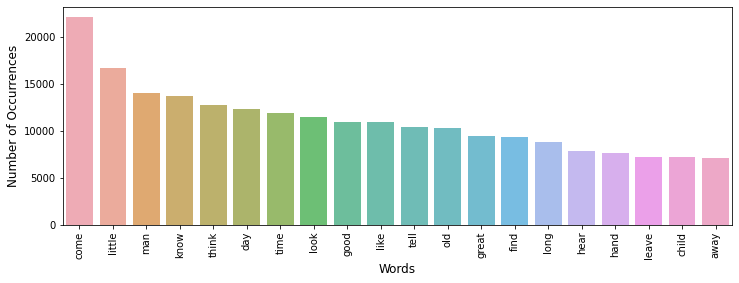

<Figure size 432x288 with 0 Axes>

In [70]:
index= [word for word, value in bar_data]
values= [value for word, value in bar_data]

plt.figure(figsize=(12,4))
sns.barplot(index, values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Words', fontsize=12)
plt.xticks(rotation=90)
plt.show();
plt.savefig('freq_words.png')

In [102]:
noun_text=[token.lower_ for token in noun_list]

In [106]:
noun_freq = Counter(noun_text)
bar_data= noun_freq.most_common(20)

In [15]:
index= [word for word, value in bar_data]
values= [value for word, value in bar_data]

plt.figure(figsize=(12,4))
sns.barplot(index, values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Nouns', fontsize=12)
plt.xticks(rotation=90)
plt.show();
plt.savefig('freq_nouns.png')

NameError: name 'bar_data' is not defined

In [110]:
verb_text=[token.lower_ for token in verb_list]
verb_freq = Counter(verb_text)
bar_data = verb_freq.most_common(20)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


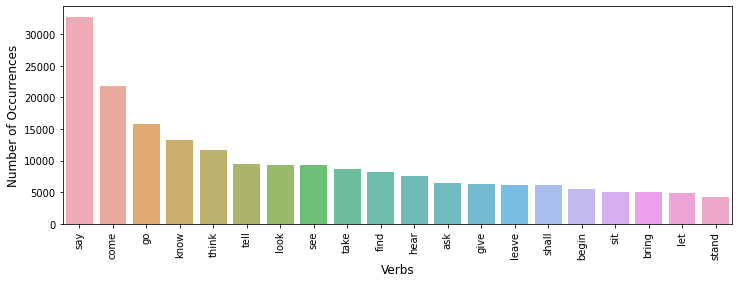

<Figure size 432x288 with 0 Axes>

In [111]:
index= [word for word, value in bar_data]
values= [value for word, value in bar_data]

plt.figure(figsize=(12,4))
sns.barplot(index, values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Verbs', fontsize=12)
plt.xticks(rotation=90)
plt.show();
plt.savefig('freq_verbs.png')

# LDA Topic Modeling

As part of my EDA, I wanted to see how this subset of the corpus would cluster. This later helped in finding keywords to further clean the dataset

In [112]:
import gensim 
from gensim import corpora 
from gensim.models import LdaModel, LdaMulticore 
import gensim.downloader as api 
from gensim.utils import simple_preprocess, lemmatize 
import textacy.vsm 
import textacy.tm

In [113]:

vectorizer = textacy.vsm.Vectorizer(tf_type="linear", apply_idf=True, idf_type="smooth", norm="l2",min_df=2, max_df=0.95)
doc_term_matrix = vectorizer.fit_transform((doc._.to_terms_list(ngrams=1, entities=True, as_strings=True) for doc in mini_df.docs))

In [114]:
model = textacy.tm.TopicModel("nmf", n_topics=25)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)

for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=25):
  print("topic", topic_idx, ":", "   ".join(top_terms))

topic 0 : come   man   time   know   day   think   old   look   find   like   great   long   tell   hand   hear   night   way   good   leave   house   young   place   stand   head   away
topic 1 : thou   thy   o   Allah   hath   King   Quoth   hast   ✿   quoth   God   till   unto   man   art   merchant   thine   Wazir   answer   Sultan   shall   wilt   lord   slay   come
topic 2 : book   story   read   child   tale   volume   edition   write   p.   page   interest   author   literature   fairy   picture   Tales   illustration   vol   work   study   Story   version   history   pp   print
topic 3 : little   child   mother   girl   baby   dear   look   old   think   oh   mamma   Mrs.   come   good   Mary   like   pretty   play   love   flower   poor   sister   Miss   doll   know
topic 4 : king   princess   prince   queen   palace   daughter   vizier   son   fairy   kingdom   youth   castle   shall   court   come   royal   send   golden   father   majesty   brother   wife   bid   dragon   

### Highlighting Bad Texts with Words from  topic modeling

In [85]:
#Further data cleaning with data from LDA
bad_words= ['illustrated', 'footnote', 'tr', 'fn','introduction', 'preface', 'une', 'histoire']

df['flag_bad_texts']= df.story_text.apply(lambda x: any(word in x.lower().replace('.','').split(' ') for word in bad_words))
df.flag_bad_texts.value_counts()

False    21463
True      1060
Name: flag_bad_texts, dtype: int64

In [86]:
df= df[df.flag_bad_texts==False]
df.reset_index(inplace=True, drop=True)


In [87]:
df=df[['story_title', 'story_text', 'book_id', 'book_author', 'book_title', 'word_count']]
